In [94]:
import os
from rdkit.Chem import Draw, MolFromSmiles
import cairosvg
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect
from rdkit import Chem
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles

In [78]:
def to_fp_ECFP(smi):
    if smi:
        mol = MolFromSmiles(smi)
        if mol is None:
            return None
        return GetMorganFingerprintAsBitVect(mol, 2, 1024)
    
    
def tanimoto_similarity(smi1, smi2):
    fp1, fp2 = None, None
    if smi1 and type(smi1)==str and len(smi1)>0:
        fp1 = to_fp_ECFP(smi1)
    if smi2 and type(smi2)==str and len(smi2)>0:
        fp2 = to_fp_ECFP(smi2)

    if fp1 is not None and fp2 is not None:
        return TanimotoSimilarity(fp1, fp2)
    else:
        return None

In [101]:
def plot_smiles_group(smiles, save_path, n_per_mol=None, img_size=None,
                      descriptions=None, n_jobs=1, substructure=None):
    kwargs = {}
    kwargs['returnPNG'] = False
    kwargs['useSVG'] = False
    # kwargs['vspace'] = 2
    molecules = list(map(MolFromSmiles, smiles))
    if substructure:
        substructure = Chem.MolFromSmiles(substructure)
    draw_options = Draw.MolDrawOptions()
    
    if n_per_mol is not None:
        kwargs['molsPerRow'] = n_per_mol
    if img_size is not None:
        kwargs['subImgSize'] = img_size
    if descriptions is not None:
        kwargs['legends'] = descriptions
    kwargs['mols'] = molecules
    
    if substructure:
        highlights = []
        for mol in molecules:
            match = mol.GetSubstructMatch(substructure)
            atom_highlights = set(match)
            bond_highlights = set()
            for atom_idx in match:
                atom_bonds = mol.GetAtomWithIdx(atom_idx).GetBonds()
                for bond in atom_bonds:
                    if bond.GetBeginAtomIdx() in match and bond.GetEndAtomIdx() in match:
                        bond_highlights.add(bond.GetIdx())
            highlights.append((atom_highlights, bond_highlights))

        kwargs['highlightAtomLists'] = [hl_atoms for hl_atoms, _ in highlights]
        kwargs['highlightBondLists'] = [hl_bonds for _, hl_bonds in highlights]

    kwargs['drawOptions'] = draw_options

    svg_data = Draw.MolsToGridImage(**kwargs)
    svg_data.save(save_path)

In [4]:
main_folder = '/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/test_decoder/'
number = [28, 98, 70, 44, 1, 60] # [28, 98, 70, 44, 1, 60, 39, 97]

In [5]:
file_folder1 = 'vaetf1_-37'
file_folder2 = 'cvaetf1-15'
file_folder3 = 'ctf1-30'
file_folder4 = 'scavaetf1-warmup15000-15'
file_folder5 = 'scacvaetfv31-beta0.01-warmup15000-17'

In [77]:
np.random.seed(109)
number = np.random.choice(100, 5)

def run(file_folder, num=number):
    smiles_list = []
    for p in num:
        df = pd.read_csv(os.path.join(main_folder, file_folder,
                         f'prediction{p}.csv'), index_col=[0])
        smiles = df['smiles'].tolist()
        smiles_list.append(smiles)
    img_size = (530, 250)
    smiles_list = list(zip(*smiles_list))
    smiles_list = [item for sub_rec in smiles_list for item in sub_rec]

    print(smiles_list)
    plot_smiles_group(smiles_list, os.path.join(main_folder, file_folder, f'prediction.png'), n_per_mol=len(num), img_size=img_size)

In [78]:
run(file_folder1)
run(file_folder2)
run(file_folder3)

['Cc1ccc(NC(=O)Cc2cnn(-c3ccccc3)c2)c(O)c1', 'Cn1ncc2c1CCCC2NC(=O)c1cc(-c2ccccc2)[nH]n1', 'Cc1ccc(NC(=O)CCc2c(C)noc2C)cc1Cl', 'CCn1cnnc1CNC(=O)Cc1cccc2ccccc12', 'COc1ccc(CN(C)C(=O)c2[nH]c(C)c(C(C)=O)c2C)cc1OC', 'Cc1ccc(NC(=O)CCn2ccccc2=O)cc1C', 'Cc1nc(C)c(C(=O)NCCc2ccccc2)s1', 'Cc1ccc(NC(=O)CCc2ccco2)cc1-n1cnnn1', 'CCn1cnnc1CNC(=O)Cc1ccccc1C', 'CC(C)(C)OC(=O)N1CCC(C(=O)NCC2CC2)CC1', 'Cc1ccc(NC(=O)CCn2ccccc2=O)cc1C', 'CC(=O)Nc1ccc(C(=O)NCC2CCCO2)cc1', 'Cc1ccc(NC(=O)CCc2ccco2)cc1-n1cnnn1', 'CCn1cnnc1CNC(=O)Cc1ccccc1C', 'CC(C)(C)OC(=O)N1CCC(C(=O)NCC2CC2)CC1', 'Cc1ccc(NC(=O)CCn2ccccc2=O)cc1C', 'CC(=O)Nc1ccc(C(=O)NCC2CCC2)cc1', 'Cc1ccc(NC(=O)CCc2ccco2)cc1-n1cnnn1', 'Cc1cc(C)n(CCCNC(=O)c2ccccc2C)n1', 'CC(C)C(NC(=O)c1ccccc1)C(=O)NCC1CC1', 'Cc1ccc(NC(=O)CCn2ccccc2=O)cc1C', 'CC(=O)Nc1ccc(C(=O)NCC2CCC2)cc1', 'Cc1ccc(NC(=O)CCc2ccccc2N)cc1', 'Cc1cc(C)n(CCCNC(=O)c2ccccc2C)n1', 'CC(C)(C)OC(=O)NCCC(=O)NCc1ccco1', 'Cc1ccc(NC(=O)CCn2ccccc2=O)cc1C', 'CC(=O)Nc1ccc(CNc2ccc(F)cc2)cc1', 'Cc1ccc(NC(=O)CCc2ccc

In [80]:
run(file_folder4)
run(file_folder5)

['Cc1ccc(NC(=O)C(C)N2CCN(C(=O)C(C)C)CC2)cc1F', 'Cc1ccc(-n2c(SC(C)C(=O)N(C)C)nc3ccccc32)cc1', 'CCCc1cc(C(=O)NCc2cccc(-n3cccn3)c2)n(C)n1', 'COc1ccccc1CC(=O)NCc1ccccc1Cl', 'CN(C)C(=O)COc1ccc(NC(=O)CCn2cncn2)cc1', 'CC(C)(C)C(=O)N1CCN(CC(=O)Nc2ccccc2F)CC1', 'CC(C)(C)NC(=O)c1ccc(-n2cnc3ccccc32)cc1', 'CC(C)Cc1cc(C(=O)NCc2cccc(-n3cccn3)c2)[nH]n1', 'NC(=O)C(NC(=O)Cc1ccccc1Cl)c1ccccc1', 'NC(=O)c1ccccc1NC(=O)CCn1cncn1', 'CC(C)(C)C(=O)N1CCN(CC(=O)Nc2ccccc2F)CC1', 'CC(C)(C)NC(=O)c1ccc(-n2cnc3ccccc32)cc1', 'CC(C)Cc1cc(C(=O)NCc2cccc(-n3cccn3)c2)[nH]n1', 'NC(=O)C(NC(=O)Cc1ccccc1Cl)c1ccccc1', 'NC(=O)c1ccccc1NC(=O)CCn1cncn1', 'CC(C)(C)C(=O)N1CCN(CC(=O)Nc2ccccc2F)CC1', 'CC(C)(C)NC(=O)c1ccc(-n2cnc3ccccc32)cc1', 'CC(C)Cc1cc(C(=O)NCc2cccc(-n3cccn3)c2)[nH]n1', 'NC(=O)C(NC(=O)Cc1ccccc1Cl)c1ccccc1', 'NC(=O)c1ccccc1NC(=O)CCn1cncn1', 'CC(C)(C)C(=O)N1CCN(CC(=O)Nc2ccccc2F)CC1', 'CC(C)(C)NC(=O)c1ccc(-n2cnc3ccccc32)cc1', 'CC(C)Cc1cc(C(=O)NCc2cccc(-n3cccn3)c2)[nH]n1', 'NC(=O)C(NC(=O)Cc1ccccc1Cl)c1ccccc1', 'NC(=O)c1cc

### line plot

In [33]:
def line_plot(df, y_label, save_path=None):
    df.index = np.arange(1, len(df)+1)
    
    fig = plt.figure(dpi=150)
    ax = df.plot(figsize=(5, 4.6), use_index=True,
                 kind='line', color='black', legend=False,
                 alpha=0.5, ax=plt.gca())
    ax.set_xlabel('Interpolation step', fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.set_yticks(np.arange(0, 1+0.2, 0.2))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    plt.tight_layout()
    # if save_path is None:
    #     plt.savefig(save_path)

In [23]:
def get_similarity(file_folder):
    sim_prev_record = {}
    sim_start_record = {}

    for p in range(100):
        sim_prev = []
        sim_start = []

        smiles = pd.read_csv(os.path.join(main_folder, file_folder,
                 f'prediction{p}.csv'), index_col=[0])['smiles'].tolist()
        
        for i in range(len(smiles)):
            start = tanimoto_similarity(smiles[0], smiles[i])
            prev = np.nan if i == 0 else tanimoto_similarity(smiles[i-1], smiles[i])
            sim_prev.append(prev)
            sim_start.append(start)
        
        sim_prev_record[p] = sim_prev
        sim_start_record[p] = sim_start

    sim_prev_record = pd.DataFrame(sim_prev_record)
    sim_start_record = pd.DataFrame(sim_start_record)

    return sim_prev_record, sim_start_record

In [67]:
file_folder1 = 'vaetf1_-37'
file_folder2 = 'cvaetf1-15'
file_folder3 = 'scavaetf1-warmup15000-15'
file_folder4 = 'scacvaetfv31-beta0.01-warmup15000-17'
file_folder5 = 'ctf1-30'
file_name = ['VAETF', 'P-VAETF', 'SCA-VAETF', 'PSCA-VAETF', 'P-TF']

In [37]:
sim_prev1, sim_start1 = get_similarity(file_folder1)
sim_prev2, sim_start2 = get_similarity(file_folder2)
sim_prev3, sim_start3 = get_similarity(file_folder3)
sim_prev4, sim_start4 = get_similarity(file_folder4)
sim_prev5, sim_start5 = get_similarity(file_folder5)

In [48]:
sim_prev_list = [sim_prev1, sim_prev2, sim_prev3, sim_prev4, sim_prev5]
sim_start_list = [sim_start1, sim_start2, sim_start3, sim_start4, sim_start5]

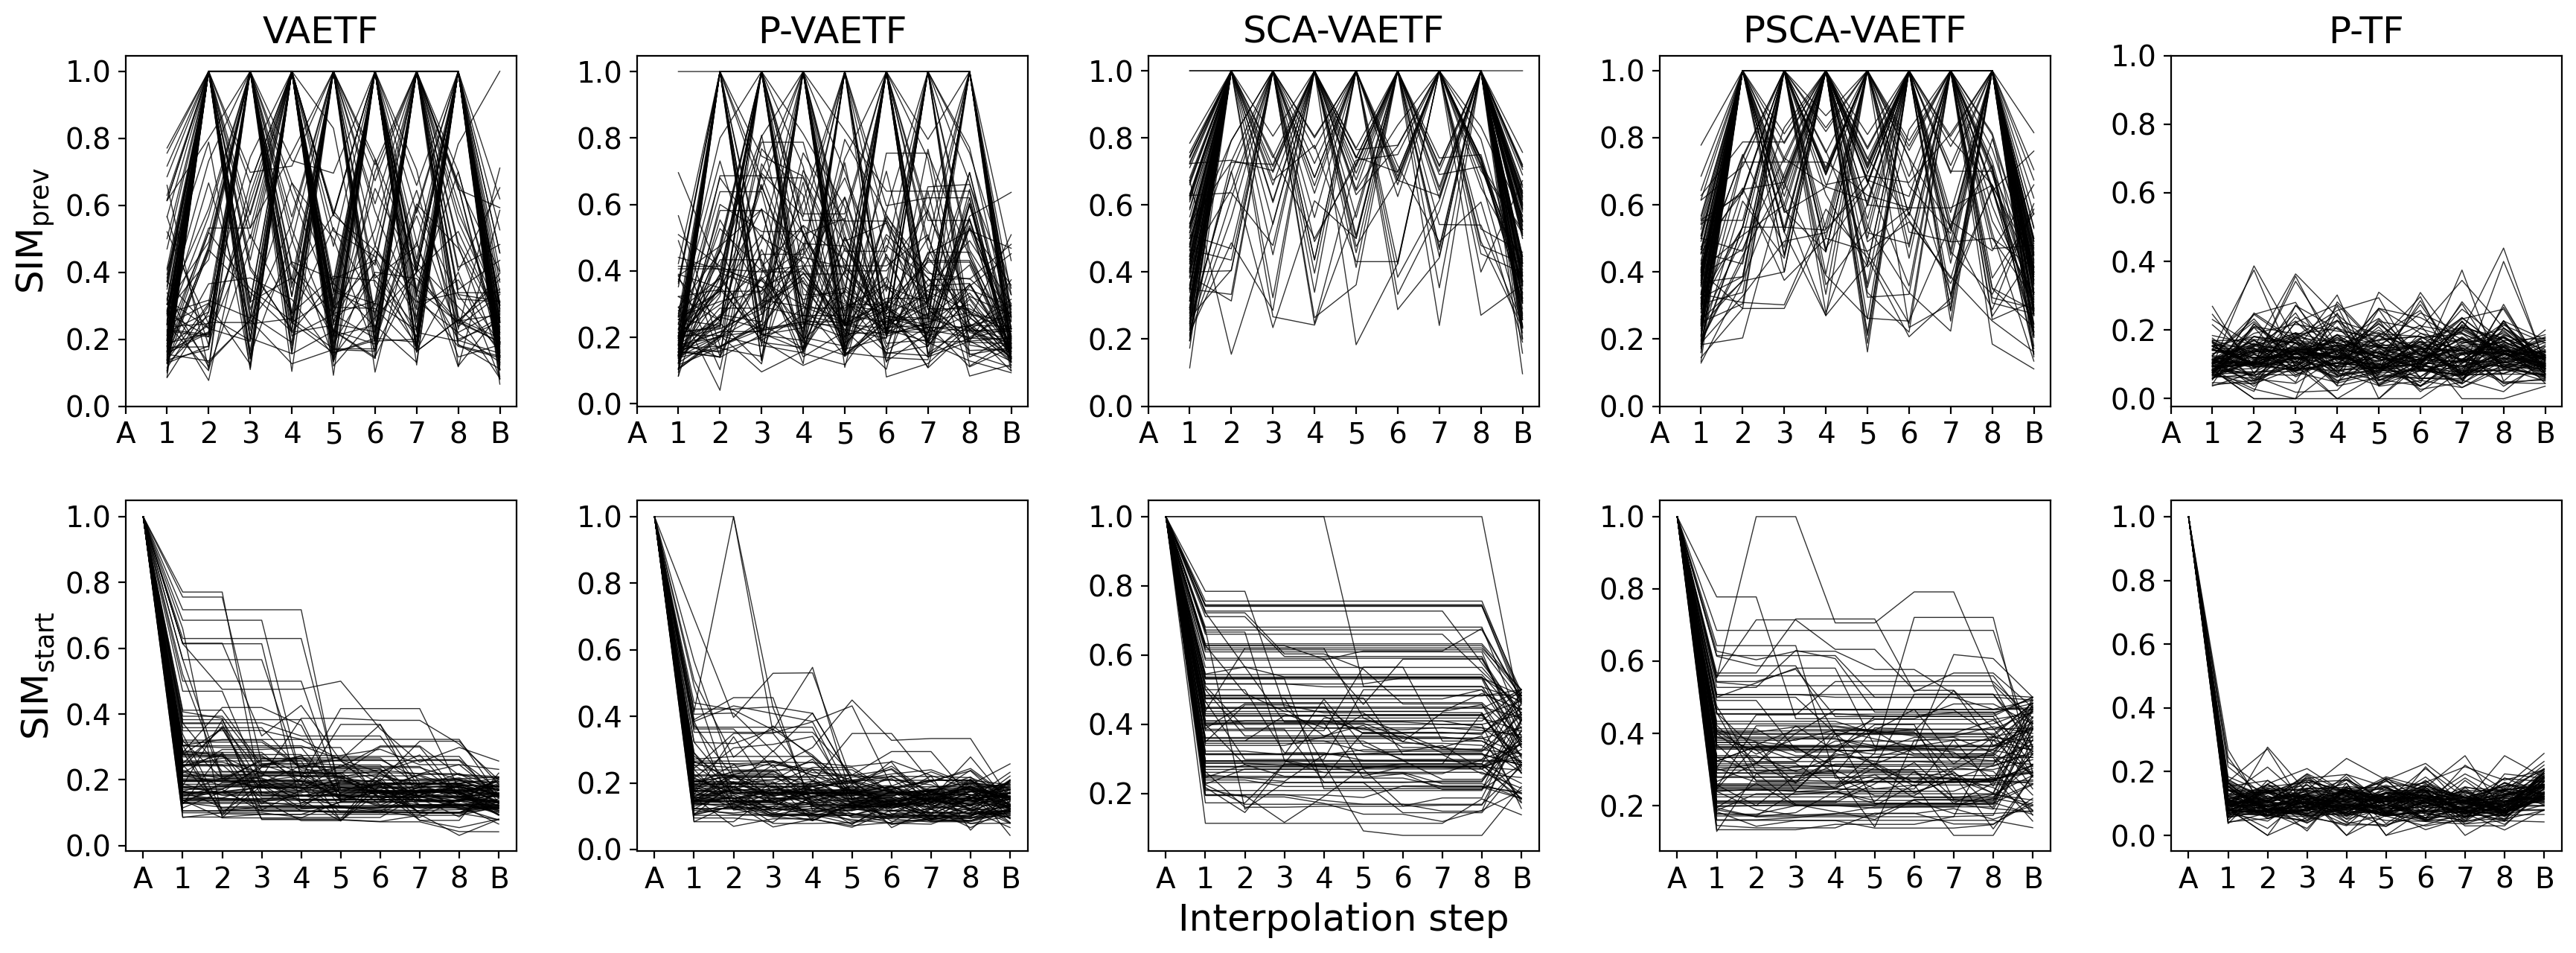

In [121]:
figsize = (17.5, 6.5)

fig, axes = plt.subplots(2, 5, dpi=200)
xticks = [i for i in range(10)]

for i, sim_prev in enumerate(sim_prev_list):
    ax = axes[0, i]

    ax = sim_prev.plot(figsize=figsize, use_index=True,
                       kind='line', color='black', legend=False,
                       alpha=0.8, ax=ax, linewidth=0.5)
    if i == 0:
        ax.set_ylabel(r'$\mathdefault{SIM}_{\mathdefault{prev}}$', fontsize=18)
    
    ax.set_title(file_name[i], fontsize=18)
    ax.set_xticks([i for i in range(10)])
    ax.set_xticklabels(['A', '1', '2', '3', '4', '5', '6', '7', '8', 'B'])

    ax.set_yticks(np.arange(0, 1+0.2, 0.2))

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)


for i, sim_prev in enumerate(sim_start_list):
    ax = axes[1, i]

    ax = sim_prev.plot(figsize=figsize, use_index=True,
                       kind='line', color='black', legend=False,
                       alpha=0.8, ax=ax, linewidth=0.5)
    # ax.set_xlabel('Interpolation step', fontsize=16)

    if i == 0:
        ax.set_ylabel(r'$\mathdefault{SIM}_{\mathdefault{start}}$', fontsize=18)
    if i == 2:
        ax.set_xlabel('Interpolation step', fontsize=18)

    ax.set_xticks([i for i in range(10)])
    ax.set_xticklabels(['A', '1', '2', '3', '4', '5', '6', '7', '8', 'B'])
    
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout(h_pad=2.5, w_pad=2)

In [102]:
number = [28, 98, 70, 44, 1, 60]
img_size = (350, 280)

num = number[0]

for i, file_folder in enumerate([file_folder1, file_folder2, file_folder3, file_folder4, file_folder5]):
    smiles = pd.read_csv(os.path.join(main_folder, file_folder,
             f'prediction{num}.csv'), index_col=[0])['smiles'].tolist()
    scaffold = None
    if i in (2, 3): 
        mol = Chem.MolFromSmiles(smiles[0])
        scaffold = MurckoScaffoldSmiles(mol=mol)
    print(scaffold)

    plot_smiles_group(smiles, f'./1-{file_folder}.png', n_per_mol=10,
                      img_size=img_size, substructure=scaffold)

None
None
O=C(NCc1ccccc1)NCc1ccccc1
O=C(NCc1ccccc1)NCc1ccccc1
None


In [105]:
number = [28, 98, 70, 44, 1, 60]
img_size = (350, 280)

num = number[0]

for i, file_folder in enumerate([file_folder1, file_folder2, file_folder3, file_folder4, file_folder5]):
    smiles = pd.read_csv(os.path.join(main_folder, file_folder,
             f'prediction{num}.csv'), index_col=[0])['smiles'].tolist()
    scaffold = None
    if i in (2, 3): 
        mol = Chem.MolFromSmiles(smiles[0])
        scaffold = MurckoScaffoldSmiles(mol=mol)

        plot_smiles_group(smiles[:1], f'./{i}.png', n_per_mol=1,
                          img_size=img_size, substructure=scaffold)
    print(scaffold)



c1ccc(Nc2ccnc3ncnn23)cc1
c1ccc(Nc2ccnc3ncnn23)cc1
O=C(NCc1ccccc1)NCc1ccccc1
O=C(NCc1ccccc1)NCc1ccccc1
c1ccc(Nc2ccnc3ncnn23)cc1


In [111]:
smiles = 'CC1CC(NC(=O)CCNC(=O)N(C)C)CC1c1ccc(Cl)cc1'
scaffold = 'c1ccc(C2CCCC2)cc1'

img_size = (650, 360)
plot_smiles_group([smiles], f'./0.png', n_per_mol=1,
                    img_size=img_size, substructure=scaffold)
plot_smiles_group([scaffold], f'./1.png', n_per_mol=1,
                    img_size=img_size)